# Explore Superfund site data

Now that I have wrangled the data into a usable format, I am going to explore further to try and pick out some intersting case studies.

In [110]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
import jenkspy
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

In [111]:
#change default figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [112]:
#read superfund site data in
superfund_in = gpd.read_file('../data/superfund-sites.geojson')
superfund = superfund_in.copy()
superfund

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
0,AK4170024323,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,51.877500,-176.652500,ADAK,[Blank County],AK,ADAK IS,99546,...,No,Yes,Yes,None,Other,No,None,51.37,www.epa.gov/superfund/adak-nas,POINT (-176.65250 51.87750)
1,AKD004904215,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,64.820300,-147.703800,FAIRBANKS,FAIRBANKS NORTH STAR,AK,157 OLD RICHARDSON HIGHWAY,99701,...,No,Yes,Yes,3/2/1993,Recycling,No,None,NaN,www.epa.gov/superfund/alaska-battery,POINT (-147.70380 64.82030)
2,AKD980983241,ALASKA RAILROAD CORP,Not on the NPL,61.222360,-149.888250,ANCHORAGE,ANCHORAGE,AK,1ST AVENUE,99501,...,No,Yes,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/alaska-railroad-anchorag...,POINT (-149.88825 61.22236)
3,AKD980988158,ARCTIC SURPLUS,Deleted from the Final NPL,64.812200,-147.564300,FAIRBANKS,[Blank County],AK,BADGER RD AND OLD RICHARDSON WAY MI. 6,99701,...,Yes,Yes,Yes,4/18/2005,Waste Management,No,None,NaN,www.epa.gov/superfund/arctic-surplus,POINT (-147.56430 64.81220)
4,AK1570028646,EIELSON AIR FORCE BASE,Currently on the Final NPL,64.671450,-147.049200,FAIRBANKS,FAIRBANKS NORTH STAR,AK,HIGHWAY 2 - 16 MI SE OF FAIRBANKS,99702,...,No,Yes,Insufficient Data,9/30/1998,Waste Management,No,None,48.14,www.epa.gov/superfund/eielson-afb,POINT (-147.04920 64.67145)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,PAD980537773,WILLIAM DICK LAGOONS,Currently on the Final NPL,40.041939,-75.898061,WEST CALN TOWNSHIP,CHESTER,PA,TELEGRAPH ROAD,19376,...,No,Yes,No,None,Waste Management,No,None,36.64,www.epa.gov/superfund/williamdicklagoons,POINT (-75.89806 40.04194)
1466,PAD980830715,YORK COUNTY SOLID WASTE AND REFUSE AUTHORITY L...,Deleted from the Final NPL,39.782361,-76.607219,HOPEWELL TOWNSHIP,YORK,PA,ROAD #3 - BOX 426,17363,...,Yes,Yes,Yes,9/29/1995,Waste Management,No,None,NaN,www.epa.gov/superfund/yorkcountysolidwasteandr...,POINT (-76.60722 39.78236)
1467,PAD002395887,ZINC CORPORATION OF AMERICA,Currently on the Final NPL,40.808331,-75.583339,PALMERTON,CARBON,PA,211 FRANKLIN ST,18071,...,No,Yes,No,None,Waste Management,No,None,42.93,www.epa.gov/superfund/palmerton,POINT (-75.58334 40.80833)
1468,PRN000204694,ATLANTIC FLEET WEAPONS TRAINING AREA,Currently on the Final NPL,18.130580,-65.310600,VIEQUES,VIEQUES,PR,Postal Address is unavailable for the Site,00765,...,No,No,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/vieques,POINT (-65.31060 18.13058)


In [113]:
# review available attributes
list(superfund.columns)

['SEMS_EPA_ID',
 'SITE_NAME',
 'NPL_STATUS_x',
 'LATITUDE',
 'LONGITUDE',
 'CITY',
 'COUNTY',
 'STATE',
 'STREET_ADDRESS',
 'ZIP_CODE',
 'REGION',
 'NPL_STATUS_y',
 'SUPERFUND_ALTERNATIVE_APPROACH',
 'SITE_WIDE_READY_FOR_ANTICIPATED_USE',
 'HUMAN_EXPOSURE_UNDER_CONTROL',
 'GROUNDWATER_MIGRATION_UNDER_CONTROL',
 'CONSTRUCTION_COMPLETION_DATE',
 'SITE_TYPE',
 'NATIVE_AMERICAN_INTEREST',
 'INDIAN_ENTITY',
 'HRS_SCORE',
 'SUPERFUND_SITE_PROFILE_PAGE_URL',
 'geometry']

Besides exploring the general distribution/location of Superfund sites, I'd also like to explore HRS (hazard ranking system) score and whether human exposure or groundwater mitigation is under control.

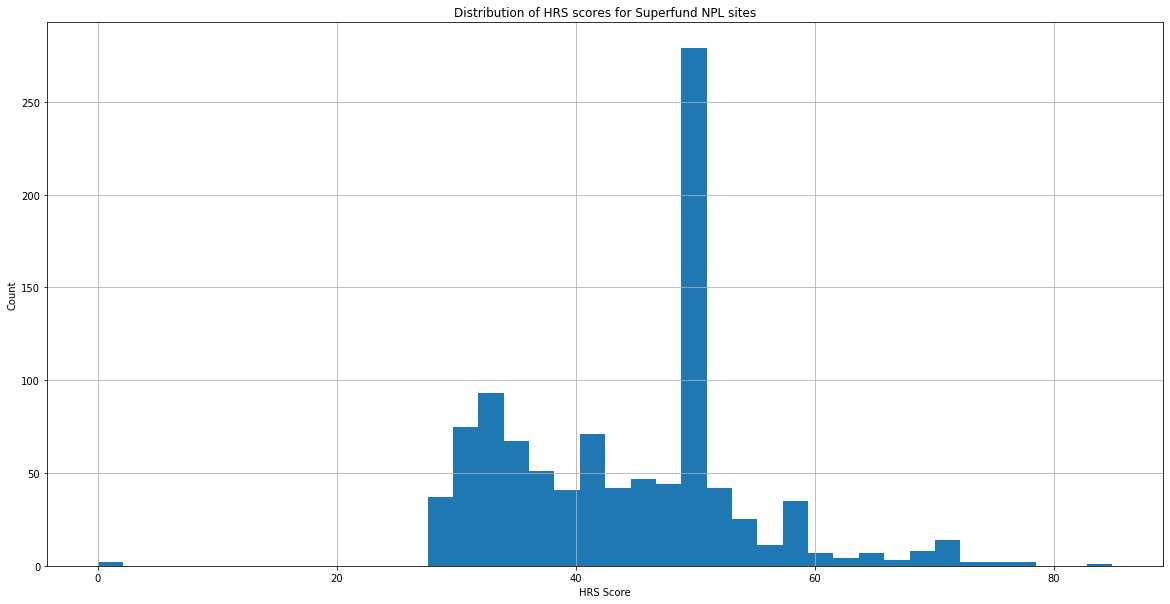

In [114]:
# plot historgram of HRS scores to view distrbution
plot = superfund['HRS_SCORE'].hist(bins=40)
plot.set(xlabel='HRS Score', ylabel='Count', title='Distribution of HRS scores for Superfund NPL sites');

In [115]:
# view HRS score descriptive statistics
superfund['HRS_SCORE'].describe()

count    1012.000000
mean       44.362609
std         9.982082
min         0.000000
25%        35.570000
50%        45.965000
75%        50.000000
max        84.910000
Name: HRS_SCORE, dtype: float64

I already know that to be eligible for the NPL a site must have a HRS score of at least 28.5. The minimum score is 0, this must be sites that had null values for the HRS column. The majority of superfund sites on the NPL have a score of around 50, 75% of sites have a score of of 50 and below. Only 25% of sites on the NPL have a score above 50. There are some sites that really stand out as having a higher HRS score than others, it looks like maybe only one has a score above 80, at the max score of 84.91.

In [116]:
# view top 5 sites with highest HRS score
high_scores = superfund.sort_values(by=['HRS_SCORE'], ascending=False)
high_scores.head()

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
1031,NJD980505416,LIPARI LANDFILL,Currently on the Final NPL,39.720281,-75.141939,PITMAN,GLOUCESTER,NJ,RT 322,08071,...,No,Yes,Yes,9/26/2018,Waste Management,No,None,75.60,www.epa.gov/superfund/lipari,POINT (-75.14194 39.72028)
111,CAD009106527,MCCORMICK & BAXTER CREOSOTING,Currently on the Final NPL,37.947851,-121.306635,STOCKTON,SAN JOAQUIN,CA,1214 W WASHINGTON ST,95203,...,No,Yes,Yes,None,Manufacturing/Processing/Maintenance,No,None,74.86,www.epa.gov/superfund/mccormick-baxter,POINT (-121.30663 37.94785)


## Missouri's Old Lead Belt

The top three sites with the highest HRS score are located in Missouri, two of which are in the same county. I can see that the two in the same county are both part of Washington County Lead District. After inspecting these sites further in QGIS, I found this area is known as Missouri's Old Lead Belt and that it contains seven Superfund sites. I also discovered that the true area encompassed by a Superfund site is often much larger than a single point location. The seven superfund sites in Missouri's Old Lead Belt cover four entire counties: Washington, Jefferson, St. Francois, and Madison. I already know that three of these sites have the highest hazard ranking scores out of any in the US. I want to see where the other four rank.

In [117]:
# filter columns for easier viewing of HRS score rankings
# view top 20 scores
high_scores.filter(['SITE_NAME', 'COUNTY', 'STATE', 'HRS_SCORE']).head(20)

,SITE_NAME,COUNTY,STATE,HRS_SCORE
804,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,ST. FRANCOIS,MO,84.91
837,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,WASHINGTON,MO,76.81
835,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,WASHINGTON,MO,76.81
1031,LIPARI LANDFILL,GLOUCESTER,NJ,75.60
111,MCCORMICK & BAXTER CREOSOTING,SAN JOAQUIN,CA,74.86
1009,HELEN KRAMER LANDFILL,GLOUCESTER,NJ,72.66
598,INDUSTRIPLEX NPL SITE,MIDDLESEX,MA,72.42
1336,PACIFIC WOOD PRESERVING OF OREGON,YAMHILL,OR,71.78
151,STOKER CHEMICAL COMPANY (1),IMPERIAL,CA,70.94
355,JOINT BASE PEARL HARBOR-HICKAM HAWAII,HONOLULU,HI,70.82


Another of Missouri's Old Lead Belt sites is in the top 20 sites, Southwest Jefferson County Mining. It has a score of 70.71 which is shared by ten of the top twenty sites. Now I want to filter just the sites in Missouri's Old Lead Belt to see what their scores are.

In [118]:
# select sites in Missouri's Old Lead Belt and sort descending by HRS score
# MINKER/STOUT/ROMAINE CREEK is not part of Missouri's Old Lead Belt
MO = superfund.loc[(superfund['STATE'] == 'MO')]
MO = MO.loc[(MO['COUNTY'] == 'ST. FRANCOIS') | (MO['COUNTY'] == 'WASHINGTON') | (MO['COUNTY'] == 'MADISON') | (MO['COUNTY'] == 'JEFFERSON')]
MO

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
802,MOD098633415,ANSCHUTZ - MADISON MINE,Currently on the Final NPL,37.546111,-90.276111,FREDERICKTOWN,MADISON,MO,401 N MINE LAMOTTE ST,63645,...,No,No,Insufficient Data,None,Mining,No,None,58.41,www.epa.gov/superfund/madisoncountymines,POINT (-90.27611 37.54611)
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
813,MOD980741912,MINKER/STOUT/ROMAINE CREEK,Currently on the Final NPL,38.440000,-90.480000,IMPERIAL,JEFFERSON,MO,4037 W ROCK CREEK RD & SWALLER,63052,...,Yes,Yes,Not a Groundwater Site,9/30/1997,Other,No,None,36.78,www.epa.gov/superfund/minkerstoutromainecreek,POINT (-90.48000 38.44000)
826,MON000705443,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,38.186794,-90.758975,JEFFERSON COUNTY,JEFFERSON,MO,"SLVR LK TRL & THNDR RDG RD,.5M W HWY WW",63023,...,No,No,No,None,Mining,No,None,70.71,www.epa.gov/superfund/southwestjeffersoncounty...,POINT (-90.75898 38.18679)
834,MON000705842,WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK,Currently on the Final NPL,37.840531,-90.799556,CALEDONIA,WASHINGTON,MO,2 MI. N OF INT. OF BIG RIVER & HWY 21,63631,...,No,No,Insufficient Data,None,"Manufacturing/Processing/Maintenance, Mining, ...",No,None,50.00,www.epa.gov/superfund/washingtoncountyfurnacec...,POINT (-90.79956 37.84053)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
836,MON000705023,WASHINGTON COUNTY LEAD DISTRICT - POTOSI,Currently on the Final NPL,37.939900,-90.772400,POTOSI,WASHINGTON,MO,500 FT EAST OF BELL ST AND VALLEY ROAD,63664,...,No,No,Insufficient Data,None,Mining,No,None,50.00,www.epa.gov/superfund/washingtoncountypotosi,POINT (-90.77240 37.93990)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)


So all seven of the Superfund sites in Missouri's Old Lead Belt have an HRS score of 50 and above, putting all seven in the 75th percentile.

I will explore this case study in the final map story, showing each site as well as the total area affected.

1. BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.
2. WASHINGTON COUNTY LEAD DISTRICT - OLD MINES
3. WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS
4. SOUTHWEST JEFFERSON COUNTY MINING: this site encompasses the entire county because mining waste has been transported by the Big River and manually relocated to other areas throughout the county.
5. ANSCHUTZ - MADISON MINE
6. WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK
7. WASHINGTON COUNTY LEAD DISTRICT - POTOSI

In [123]:
superfund_filter = superfund.loc[(superfund['HUMAN_EXPOSURE_UNDER_CONTROL'] == 'No') & (superfund['GROUNDWATER_MIGRATION_UNDER_CONTROL'] == 'No')]
superfund_filter.head()

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
115,CAD008242711,MONTROSE CHEMICAL (MONTROSE SUPERFUND SITE),Currently on the Final NPL,33.848331,-118.298300,TORRANCE,LOS ANGELES,CA,20201 S NORMANDIE AVE,90502,...,No,No,No,None,Manufacturing/Processing/Maintenance,No,None,32.10,www.epa.gov/superfund/montrose,POINT (-118.29830 33.84833)
152,CAD980893275,SULPHUR BANK MERCURY MINE,Currently on the Final NPL,39.005550,-122.670300,CLEARLAKE OAKS,LAKE,CA,SULPHUR BANK ROAD,95422,...,No,No,No,None,Waste Management,Yes,Elem Indian Colony of Pomo Indians of the Sulp...,44.42,www.epa.gov/superfund/sulphurbankmercury,POINT (-122.67030 39.00555)
176,COD980717557,"CENTRAL CITY, CLEAR CREEK",Currently on the Final NPL,39.771820,-105.518170,IDAHO SPRINGS,CLEAR CREEK,CO,NEAR TOWN,80452,...,No,No,No,None,Mining,No,None,51.39,www.epa.gov/superfund/central-city,POINT (-105.51817 39.77182)
339,GAD099303182,"LCP CHEMICALS, GEORGIA",Currently on the Final NPL,31.189444,-81.508333,BRUNSWICK,GLYNN,GA,4014 ROSS RD,31520,...,No,No,No,None,Manufacturing/Processing/Maintenance,No,None,NaN,www.epa.gov/superfund/lcp-chemicals-georgia,POINT (-81.50833 31.18944)
384,IDD048340921,BUNKER HILL MINING & METALLURGICAL COMPLEX,Currently on the Final NPL,47.543061,-116.161700,SMELTERVILLE,SHOSHONE,ID,SILVER VLY,83837,...,No,No,No,None,"Manufacturing/Processing/Maintenance, Mining",Yes,Coeur D'Alene Tribe; Spokane Tribe of the Spok...,54.76,www.epa.gov/superfund/bunker-hill,POINT (-116.16170 47.54306)


In [125]:
superfund_filter.sort_values(by=['HRS_SCORE'], ascending=False)

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
415,ILD062340641,EXXON MOBIL MINING AND MINERALS COMPANY,Currently on the Final NPL,41.327778,-89.304167,DEPUE,BUREAU,IL,DEPOT ST & MARQUETTE ST,61356,...,No,No,No,None,"Manufacturing/Processing/Maintenance, Manufact...",No,None,70.71,www.epa.gov/superfund/depue-newjersey-zinc,POINT (-89.30417 41.32778)
592,MAD002084093,GE PITTSFIELD HOUSATONIC RIVER SUPERFUND SITE,Proposed for NPL,42.450278,-73.232222,PITTSFIELD,BERKSHIRE,MA,"BETWEEN PITTSFIELD AND LENOX, MA",01201,...,No,No,No,None,Manufacturing/Processing/Maintenance,Yes,Mashantucket Pequot Indian Tribe; Mashpee Wamp...,70.71,www.epa.gov/superfund/ge,POINT (-73.23222 42.45028)
826,MON000705443,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,38.186794,-90.758975,JEFFERSON COUNTY,JEFFERSON,MO,"SLVR LK TRL & THNDR RDG RD,.5M W HWY WW",63023,...,No,No,No,None,Mining,No,None,70.71,www.epa.gov/superfund/southwestjeffersoncounty...,POINT (-90.75898 38.18679)
522,KSD980741862,CHEROKEE COUNTY,Currently on the Final NPL,37.079653,-94.724186,GALENA,CHEROKEE,KS,SOUTHEAST PORTION OF THE STATE OF KS,66739,...,No,No,No,None,Mining,Yes,None,58.15,www.epa.gov/superfund/cherokeecounty,POINT (-94.72419 37.07965)
384,IDD048340921,BUNKER HILL MINING & METALLURGICAL COMPLEX,Currently on the Final NPL,47.543061,-116.161700,SMELTERVILLE,SHOSHONE,ID,SILVER VLY,83837,...,No,No,No,None,"Manufacturing/Processing/Maintenance, Mining",Yes,Coeur D'Alene Tribe; Spokane Tribe of the Spok...,54.76,www.epa.gov/superfund/bunker-hill,POINT (-116.16170 47.54306)
749,MID000722439,VELSICOL CHEMICAL CORP. (MICHIGAN),Currently on the Final NPL,43.410561,-84.618611,ST. LOUIS,GRATIOT,MI,500 N BANKSON STREET,48880,...,No,No,No,9/25/1992,Manufacturing/Processing/Maintenance,Yes,"Sault Ste. Marie Tribe of Chippewa Indians, Mi...",52.29,www.epa.gov/superfund/velsicol-chemical-michigan,POINT (-84.61861 43.41056)
176,COD980717557,"CENTRAL CITY, CLEAR CREEK",Currently on the Final NPL,39.771820,-105.518170,IDAHO SPRINGS,CLEAR CREEK,CO,NEAR TOWN,80452,...,No,No,No,None,Mining,No,None,51.39,www.epa.gov/superfund/central-city,POINT (-105.51817 39.77182)
979,NJD981557879,CORNELL DUBILIER ELECTRONICS INC,Currently on the Final NPL,40.576389,-74.414167,SOUTH PLAINFIELD,MIDDLESEX,NJ,333 HAMILTON BLVD,07080,...,No,No,No,None,Manufacturing/Processing/Maintenance,No,None,50.27,www.epa.gov/superfund/cornell-dubilier,POINT (-74.41417 40.57639)
1337,ORSFN1002155,PORTLAND HARBOR,Currently on the Final NPL,45.615278,-122.793056,PORTLAND,MULTNOMAH,OR,BETWEEN RM 1.9 AND 11.8 IN PORTLAND,97231,...,No,No,No,None,Other,Yes,Confederated Tribes and Bands of the Yakama Na...,50.00,www.epa.gov/superfund/portland-harbor,POINT (-122.79306 45.61528)
815,MOD981507585,NEWTON COUNTY MINE TAILINGS,Currently on the Final NPL,36.992100,-94.384800,GRANBY,NEWTON,MO,ENTIRE TOWN OF,64844,...,No,No,No,None,Other,No,None,50.00,www.epa.gov/superfund/newtoncountymine,POINT (-94.38480 36.99210)


There are three sites without groundwater mitigation nor human exposure under control tied for the top site. Southwest Jefferson County Mining is already included in the first case study. After viewing each site's profile page, the GE-Pittsfield Housatonic River Superfund Site will make for a more compelling case study. From 1932 through 1977 at this site, General Electric manufactured and serviced electrical transformers containing PCBs. Years of PCB and industrial chemical use, and improper disposal, led to extensive contamination around Pittsfield, MA as well as down the entire length of the Housatonic River through Connecticut to the Long Island Sound.

### Clean and export final Superfund site geojson

Now that I have explored the Superfund data and picked out the case studies I want to focus on in the map story, I am going to remove extra attributes and export a cleaned and final geojson.

In [126]:
list(superfund.columns)

['SEMS_EPA_ID',
 'SITE_NAME',
 'NPL_STATUS_x',
 'LATITUDE',
 'LONGITUDE',
 'CITY',
 'COUNTY',
 'STATE',
 'STREET_ADDRESS',
 'ZIP_CODE',
 'REGION',
 'NPL_STATUS_y',
 'SUPERFUND_ALTERNATIVE_APPROACH',
 'SITE_WIDE_READY_FOR_ANTICIPATED_USE',
 'HUMAN_EXPOSURE_UNDER_CONTROL',
 'GROUNDWATER_MIGRATION_UNDER_CONTROL',
 'CONSTRUCTION_COMPLETION_DATE',
 'SITE_TYPE',
 'NATIVE_AMERICAN_INTEREST',
 'INDIAN_ENTITY',
 'HRS_SCORE',
 'SUPERFUND_SITE_PROFILE_PAGE_URL',
 'geometry']

In [127]:
superfund = superfund.filter(['SITE_NAME', 'NPL_STATUS_x', 'SUPERFUND_ALTERNATIVE_APPROACH', 'HUMAN_EXPOSURE_UNDER_CONTROL', 'GROUNDWATER_MIGRATION_UNDER_CONTROL', 'HRS_SCORE', 'geometry'], axis=1)
superfund = superfund.rename(columns={'NPL_STATUS_x': 'NPL_STATUS', 'SUPERFUND_ALTERNATIVE_APPROACH': 'SUPERFUND_ALT', 'HUMAN_EXPOSURE_UNDER_CONTROL':'HUMAN_EXPOSURE', 'GROUNDWATER_MIGRATION_UNDER_CONTROL': 'GROUNDWATER_MITIGATION'})
superfund

,SITE_NAME,NPL_STATUS,SUPERFUND_ALT,HUMAN_EXPOSURE,GROUNDWATER_MITIGATION,HRS_SCORE,geometry
0,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,No,Yes,Yes,51.37,POINT (-176.65250 51.87750)
1,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,No,Yes,Yes,NaN,POINT (-147.70380 64.82030)
2,ALASKA RAILROAD CORP,Not on the NPL,Yes,Yes,Insufficient Data,NaN,POINT (-149.88825 61.22236)
3,ARCTIC SURPLUS,Deleted from the Final NPL,No,Yes,Yes,NaN,POINT (-147.56430 64.81220)
4,EIELSON AIR FORCE BASE,Currently on the Final NPL,No,Yes,Insufficient Data,48.14,POINT (-147.04920 64.67145)
...,...,...,...,...,...,...,...
1465,WILLIAM DICK LAGOONS,Currently on the Final NPL,No,Yes,No,36.64,POINT (-75.89806 40.04194)
1466,YORK COUNTY SOLID WASTE AND REFUSE AUTHORITY L...,Deleted from the Final NPL,No,Yes,Yes,NaN,POINT (-76.60722 39.78236)
1467,ZINC CORPORATION OF AMERICA,Currently on the Final NPL,No,Yes,No,42.93,POINT (-75.58334 40.80833)
1468,ATLANTIC FLEET WEAPONS TRAINING AREA,Currently on the Final NPL,No,No,Insufficient Data,NaN,POINT (-65.31060 18.13058)


In [128]:
# sample of sites chosen for case studies
superfund.loc[(superfund['SITE_NAME'] == 'BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP') | (superfund['SITE_NAME'] == 'WASHINGTON COUNTY LEAD DISTRICT - OLD MINES') |(superfund['SITE_NAME'] == 'WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS') |(superfund['SITE_NAME'] == 'SOUTHWEST JEFFERSON COUNTY MINING') |(superfund['SITE_NAME'] == 'ANSCHUTZ - MADISON MINE') |(superfund['SITE_NAME'] == 'WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK') |(superfund['SITE_NAME'] == 'WASHINGTON COUNTY LEAD DISTRICT - POTOSI') |(superfund['SITE_NAME'] == 'GE PITTSFIELD HOUSATONIC RIVER SUPERFUND SITE')]

,SITE_NAME,NPL_STATUS,SUPERFUND_ALT,HUMAN_EXPOSURE,GROUNDWATER_MITIGATION,HRS_SCORE,geometry
592,GE PITTSFIELD HOUSATONIC RIVER SUPERFUND SITE,Proposed for NPL,No,No,No,70.71,POINT (-73.23222 42.45028)
802,ANSCHUTZ - MADISON MINE,Currently on the Final NPL,No,No,Insufficient Data,58.41,POINT (-90.27611 37.54611)
826,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,No,No,No,70.71,POINT (-90.75898 38.18679)
834,WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK,Currently on the Final NPL,No,No,Insufficient Data,50.00,POINT (-90.79956 37.84053)
835,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,No,No,Insufficient Data,76.81,POINT (-90.73833 38.07528)
836,WASHINGTON COUNTY LEAD DISTRICT - POTOSI,Currently on the Final NPL,No,No,Insufficient Data,50.00,POINT (-90.77240 37.93990)
837,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,No,No,Insufficient Data,76.81,POINT (-90.81426 38.16615)


In [129]:
# export geodataframe to geojson for further exploration
superfund.to_file("../data/superfund-sites.geojson", driver='GeoJSON', encoding='utf-8')